<a href="https://colab.research.google.com/github/TonyaAlekhina/Big-Data-Analysis/blob/main/Project_Abonents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследования пользователей оператора сотовой связи
Вы аналитик оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

1.	Ежемесячная плата: 550 рублей

2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3.	Стоимость услуг сверх тарифного пакета:

o	минута разговора: 3 рубля

o	сообщение: 3 рубля

o	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

1.	Ежемесячная плата: 1950 рублей

2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

3.	Стоимость услуг сверх тарифного пакета:

o	минута разговора: 1 рубль

o	сообщение: 1 рубль

o	1 Гб интернет-трафика: 150 рублей

Примечание:

Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание данных

Таблица users (информация о пользователях):

  *	user_id — уникальный идентификатор пользователя

  *	first_name — имя пользователя

  *	last_name — фамилия пользователя

  *	age — возраст пользователя (годы)

  *	reg_date — дата подключения тарифа (день, месяц, год)

  *	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
  *	city — город проживания пользователя

  *	tarif — название тарифного плана

Таблица calls (информация о звонках):

  *	id — уникальный номер звонка

  *	call_date — дата звонка

  *	duration — длительность звонка в минутах

  *	user_id — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):

  *	id — уникальный номер сообщения
  
  *	message_date — дата сообщения
  
  *	user_id — идентификатор пользователя, отправившего сообщение


Таблица internet (информация об интернет-сессиях):

  *	id — уникальный номер сессии

  *	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

  *	session_date — дата интернет-сессии

  *	user_id — идентификатор пользователя


Таблица tariffs (информация о тарифах):
  
  *	tariff_name — название тарифа
  
  *	rub_monthly_fee — ежемесячная абонентская плата в рублях
  
  *	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

  *	messages_included — количество сообщений в месяц, включённых в абонентскую плату

  *	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

  *	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

  *	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

  *	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Откройте файлы с данными и изучите общую информацию

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузите файлы 'users.csv',  'tariffs.csv', 'calls.csv', 'internet.csv', 'messages.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
users = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 5/users.csv', sep=",")
tariffs = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 5/tariffs.csv', sep=",")
calls = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 5/calls.csv', sep=",")
internet = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 5/internet.csv', sep=",", index_col=0)
messages = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 5/messages.csv', sep=",")


Mounted at /content/drive


In [ ]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Изучите общую информацию о данных, содержащихся в файлах. Изучите типы данных. Оцените число пропусков в каждом датасете.

In [ ]:
all = [users, tariffs, calls, internet, messages]

for el in all:
  print(el.info())
  print('Not have')
  print(el.isnull().sum())
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Not have
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_in

Датасет users содержит информацию о пользователях. Столбец churn_date содержит большое количество значений NaN, т.к. эти пользователи ещё активны. Столбцы reg_date и churn_date являются типом object, необходимо перевести их в формат даты.

Датасет calls содержит сведения о совершенных звонках и их продолжительности. Пропусков нет. Столбец call_date является типом object, необходимо перевести в формат даты. Столбец id характеризует идентификатор записи, т.е. каждый совершенный звонок, совершённый пользоватлем.

Датасет messages содержит даты переданных сообщений. Пропусков нет. Столбец message_date	 является типом object, необходимо перевести в формат даты.

Датасет internet содержит информацию об израсходаванных Мб траффика интернета и даты сессий пользователей. Пропусков нет. Столбец session_date является типом object, необходимо пеервести в формат даты. Столбец Unnamed: 0 содержит номер записи, т.е. новую сессию для каждого пользователя. Никакой информации в себе не несет, т.к. есть столбец id, характреизующий каждую сессию. Этот столбец можно удалить.

Датасет tariffs содержит сведения о тарифах. Пропусков нет. 


# Шаг 2. Подготовьте данные

•	Приведите данные к нужным типам;

•	Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Приведем к формату даты столбцы reg_date и churn_date в users, call_date в calls, message_date в messages и session_date в internet методом pd.to_datetime

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT')
calls['message_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')

In [ ]:
calls.dtypes

id                      object
call_date               object
duration               float64
user_id                  int64
message_date    datetime64[ns]
dtype: object

Изучите статистические характеристики. Выведите на экран описательную статистику для всех датасетов, кроме messeges, т.к. в нем нет количественных переменных (кроме user_id). Используйте метод describe()

In [ ]:
for i in all:
  print(i.describe())
  print()

           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000   

Никаких подозрительных значений (типа отрицательного возраста, отрицательного числа минут разговоров или отрицательных значений использованного траффика не обраружено).






Проверьте данные на наличие явных дубликатов методом duplicated().

In [ ]:
for i in all:
  print(i.duplicated().sum())
  print()

0

0

0

0

0



Явных дубликатов нет.  

Проверьте наличие неявных дубликатов в информации о пользователях. Для этого рассмотрите уникальные значения в именах пользователей, городов проживания. Используйте метод unique()

In [ ]:
users['first_name'].sort_values().unique()

array(['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён',
       'Алан', 'Алевтина', 'Александр', 'Александра', 'Алексей', 'Алина',
       'Алиса', 'Алла', 'Альберта', 'Альбин', 'Альфред', 'Алёна',
       'Анатолий', 'Анвар', 'Ангелина', 'Андрей', 'Анжелика', 'Анита',
       'Антонина', 'Анфиса', 'Арина', 'Арнольд', 'Арсен', 'Арсений',
       'Артемий', 'Артём', 'Аурелия', 'Афанасий', 'Ахмет', 'Аюна',
       'Белла', 'Берта', 'Борис', 'Вадим', 'Валентина', 'Валерий',
       'Валерия', 'Варвара', 'Варлам', 'Василиса', 'Вениамин', 'Вера',
       'Вероника', 'Веселина', 'Виктор', 'Виктория', 'Виолетта',
       'Виталий', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Габриель', 'Габриэль', 'Гайдар', 'Галина', 'Гарри', 'Гектор',
       'Гелена', 'Геннадий', 'Геодар', 'Георгий', 'Георгина', 'Геральд',
       'Герасим', 'Глеб', 'Гордей', 'Григорий', 'Дайна', 'Дана', 'Даниил',
       'Даниэла', 'Дебора', 'Демьян', 'Денис', 'Джемма', 'Джозефина',
       'Джулия', '

In [ ]:
users['last_name'].sort_values().unique()

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

In [ ]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Неверных написаний фамилий, имён пользователей и городов их проживания не обнаружено. Неявных дубликатов в датасете users нет.

Неявных дубликатов тоже не обнаружено

В примечании сказано, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Округлите длительности разговоров каждого пользователя до целого вверх. Используйте метод ceil().

In [ ]:
calls['duration'] = np.ceil(calls['duration']).astype(int)



### Посчитайте для каждого пользователя:
•	количество сделанных звонков и израсходованных минут разговора по месяцам;

•	количество отправленных сообщений по месяцам;

•	объем израсходованного интернет-трафика по месяцам;

•	помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [ ]:
#Выделим месяц совершения звонка в датасете calls и сформируем таблицу calls_month с количеством сделанных звонков и израсходованных минут разговора по месяцам
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_month = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
calls_month.columns = ['user_id', 'month' ,'call_per_month', 'minute_per_month']

calls_month.head()

,user_id,month,call_per_month,minute_per_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [ ]:
#Выделим месяц отправки сообщений в датасете messages и сформируем  таблицу messages_month с количеством отправленных сообщений по месяцам
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_month = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
messages_month.columns = ['user_id', 'month' , 'messages_per_month']

messages_month.head()


,user_id,month,messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [ ]:
#Выделим месяц использования интернета в датасете internet и сформируем сводную таблицу internet_month с объемом израсходованного интернет-трафика по месяцам 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_month = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()
internet_month.columns = ['user_id', 'month' , 'mb_per_month']

internet_month.head()

,user_id,month,mb_per_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


В примечании сказано, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Поэтому округлите полученные результаты объема использованного траффика в большую сторону до целого.


In [ ]:
# Напишем функции для выполнения округления вверх
def int_th(num):
    num = math.ceil(num / 1024)
    return num

def int_r(num):
    num = math.ceil(num)
    return num

In [ ]:
internet_month['mb_per_month'] = internet_month['mb_per_month'].apply(int_r).astype(int)
internet_month['gb_per_month'] = internet_month['mb_per_month'].apply(int_th).astype(int)

internet_month.head()

,user_id,month,mb_per_month,gb_per_month
0,1000,5,2254,3
1,1000,6,23234,23
2,1000,7,14004,14
3,1000,8,14056,14
4,1000,9,14569,15


Выясните количество абонентов, которые совершают звонки, отправляют СМС и используют интернет. Используйте метод nunique()

In [ ]:
# Определим количество уникальных абонентов, которые совершали звонки, отправляли СМС, использовали интернет-траффик
print(calls_month['user_id'].nunique())
print(messages_month['user_id'].nunique())
print(internet_month['user_id'].nunique())

492
426
497


Видим, что не все абоненты совершали звонки, отправляли сообщения, использовали интернет-траффик

Объединим все полученные таблицы со сведениямии об абонентах в один датафрейм abonents методом merge().

In [ ]:
abonents = pd.merge(calls_month, messages_month, how ='outer', on = ['user_id', 'month'])
abonents = pd.merge(abonents, internet_month, how ='outer', on = ['user_id', 'month'])
abonents.head()

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month
0,1000,5,22.0,159.0,22.0,2254.0,3.0
1,1000,6,43.0,172.0,60.0,23234.0,23.0
2,1000,7,47.0,340.0,75.0,14004.0,14.0
3,1000,8,52.0,408.0,81.0,14056.0,14.0
4,1000,9,58.0,466.0,57.0,14569.0,15.0


Добавим в этот датафрейм сведения о пользователях из таблицы users

In [ ]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [ ]:
user1 = users.loc[:, ['user_id', 'city', 'tariff']]

abonents = pd.merge(abonents, user1, how ='outer', on = ['user_id'])
abonents

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff
0,1000,5.0,22.0,159.0,22.0,2254.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23234.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14004.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14056.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14569.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19560.0,20.0,Санкт-Петербург,smart
3212,1489,11.0,NaN,NaN,20.0,17492.0,18.0,Санкт-Петербург,smart
3213,1489,12.0,NaN,NaN,35.0,17323.0,17.0,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


Проверьте количество абонентов в полученной таблице методом nunique()

In [ ]:
abonents['user_id'].nunique()

500

In [ ]:
# Определите количество пропущенных значений в столбцах month, calls_per_month, messages_per_month, mb_per_month в таблице abonents
print(abonents['month'].isna().sum())
print(abonents['call_per_month'].isna().sum())
print(abonents['messages_per_month'].isna().sum())
print(abonents['mb_per_month'].isna().sum())

2
42
499
13


In [ ]:
# Выясните, есть ли абоненты, которые не совершали звонки, не отправляли СМС, не использовали интернет-траффик
abonents.loc[(abonents['call_per_month'].isna() == True) & (abonents['messages_per_month'].isna() == True) & (abonents['mb_per_month'].isna() == True)]

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,Волжский,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,Омск,smart


Видим, что два абонента не пользовались ни интернетом, не отправляли сообщений и не совершали звонки. И столбец month для этих пользователей пуст. 

Проверьте дату подключения этих абонентов. Обратитесь к таблице users и проверьте reg_data для этих пользователей

In [ ]:
users.query('user_id == 1128 or user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Эти абоненты были подключены в декабре, поэтому пропущенное значение в столбце month таблицы abonents замените на значение 12. 

Используйте метод fillna()

In [ ]:
abonents['month'].fillna(12, inplace = True)

In [ ]:
abonents.loc[(abonents['call_per_month'].isna() == True) & (abonents['messages_per_month'].isna() == True) & (abonents['mb_per_month'].isna() == True)]

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff
3214,1128,12.0,NaN,NaN,NaN,NaN,NaN,Волжский,ultra
3215,1371,12.0,NaN,NaN,NaN,NaN,NaN,Омск,smart


Заполните отсутствующие значения в calls_per_month, minute_per_month, messages_per_month, gb_per_month значением 0. 

Используйте метод fillna()

In [ ]:
for i in ['call_per_month', 'minute_per_month', 'messages_per_month', 'mb_per_month', 'gb_per_month']:
  abonents[i].fillna(0, inplace = True) 

In [ ]:
abonents.isna().sum()

user_id               0
month                 0
call_per_month        0
minute_per_month      0
messages_per_month    0
mb_per_month          0
gb_per_month          0
city                  0
tariff                0
dtype: int64

In [ ]:
abonents.head()

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff
0,1000,5.0,22.0,159.0,22.0,2254.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23234.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14004.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14056.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14569.0,15.0,Краснодар,ultra


In [ ]:
#Измените тип данных на целое в столбцах calls_per_month, minute_per_month, messages_per_month, mb_per_month, gb_per_month
for i in ['month', 'call_per_month', 'minute_per_month', 'messages_per_month', 'mb_per_month', 'gb_per_month' ]:
  abonents[i] = abonents[i].astype(int)

In [ ]:
abonents.dtypes

user_id                int64
month                  int64
call_per_month         int64
minute_per_month       int64
messages_per_month     int64
mb_per_month           int64
gb_per_month           int64
city                  object
tariff                object
dtype: object

Добавьте в таблицу abonents сведения о помесячной выручке с каждого пользователя. Для этого обратитесь к таблице tariffs с описанием тарифных планов

In [ ]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
def income_month(ab_month):
        
    if ab_month['tariff'] == 'smart':
        
        inc_calls = (ab_month['minute_per_month'] - tariffs.loc[0,'minutes_included']) * tariffs.loc[0,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_mess = (ab_month['messages_per_month'] - tariffs.loc[0,'messages_included']) * tariffs.loc[0,'rub_per_message']
        if inc_mess < 0 :
            inc_mess = 0
        
        # int_r(num) - Функция округления вверх. Описывалась выше
        inc_mb  = int_r((ab_month['mb_per_month'] - tariffs.loc[0,'mb_per_month_included'])/1024) * tariffs.loc[0,'rub_per_gb'] 
        if inc_mb < 0 :
            inc_mb = 0
             
        inc = inc_calls + inc_mess + inc_mb + tariffs.loc[0,'rub_monthly_fee']
        
    else:
        
        inc_calls = (ab_month['minute_per_month'] - tariffs.loc[1,'minutes_included']) * tariffs.loc[1,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_mess = (ab_month['messages_per_month'] - tariffs.loc[1,'messages_included']) * tariffs.loc[1,'rub_per_message']
        if inc_mess < 0 :
            inc_mess = 0
        
        inc_mb  = int_r((ab_month['mb_per_month'] - tariffs.loc[1,'mb_per_month_included'])/1024) * tariffs.loc[1,'rub_per_gb'] 
        if inc_mb < 0 :
            inc_mb = 0
             
        inc = inc_calls + inc_mess + inc_mb + tariffs.loc[1,'rub_monthly_fee']
    
    return inc



In [ ]:
abonents['income'] = abonents.apply(income_month, axis = 1)
abonents.sample(5)

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff,income
3068,1480,9,58,305,19,13640,14,Новокузнецк,smart,550
2132,1340,6,68,535,14,18911,19,Пенза,smart,1455
1289,1204,2,43,367,0,19746,20,Москва,smart,1550
2449,1388,10,65,421,0,26756,27,Вологда,smart,2950
2690,1423,12,34,219,49,17072,17,Астрахань,smart,950


### Вывод
В данных не обнаружено пропусков и дубликатов, значения NaN соответствуют нулевым значениям, замена на которые была выполнена. Сформирована новая таблица, содержащая сведения об израсходаванных минутах, сообщениях и Мб интернет-траффика для каждого пользователя ежемесячно. 

Не все абоненты совершали звонки, отправляли сообщения, использовали интернет-траффик. 

Определена ежемесячная выручка от каждого абонента с учетом тарифа подключения.

# Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Определите количество абонентов, подключенных к различным тарифам. Постройте график в виде столбчатой диаграммы методом countplot().


In [ ]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [ ]:
users['tariff'].value_counts(normalize = True)

smart    0.702
ultra    0.298
Name: tariff, dtype: float64

70,2% абонентов подключены к тарифу "smart", остальные 29,8% - к тарифу "ultra"

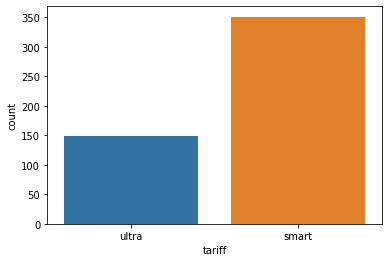

In [ ]:
sns.countplot(x = users['tariff'])
plt.show()

In [ ]:
# разобьем всех абонентов на 2 таблицы по тарифу: smart_abonent и ultra_abonent
smart_abonent = abonents.query('tariff == "smart"').reset_index(drop = True)
ultra_abonent = abonents.query('tariff == "ultra"').reset_index(drop = True)

display(smart_abonent.head())
display(ultra_abonent.head())

,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff,income
0,1001,11,59,430,0,18430,18,Москва,smart,1150
1,1001,12,63,414,0,14037,14,Москва,smart,550
2,1002,6,15,117,4,10857,11,Стерлитамак,smart,550
3,1002,7,26,214,11,17581,18,Стерлитамак,smart,1150
4,1002,8,42,289,13,20320,20,Стерлитамак,smart,1550


,user_id,month,call_per_month,minute_per_month,messages_per_month,mb_per_month,gb_per_month,city,tariff,income
0,1000,5,22,159,22,2254,3,Краснодар,ultra,1950
1,1000,6,43,172,60,23234,23,Краснодар,ultra,1950
2,1000,7,47,340,75,14004,14,Краснодар,ultra,1950
3,1000,8,52,408,81,14056,14,Краснодар,ultra,1950
4,1000,9,58,466,57,14569,15,Краснодар,ultra,1950


In [ ]:
# сгрупируем данные об абонентах различных тарифов по месяцам
smart_abonent_month = smart_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].sum().reset_index()
ultra_abonent_month = ultra_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].sum().reset_index()

ultra_abonent_month.head()


<ipython-input-163-2eddc16037b2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  smart_abonent_month = smart_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].sum().reset_index()
<ipython-input-163-2eddc16037b2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ultra_abonent_month = ultra_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].sum().reset_index()


,month,call_per_month,minute_per_month,messages_per_month,gb_per_month,income
0,1,535,3853,304,119,17550
1,2,997,7131,527,288,47400
2,3,2504,18117,1195,653,74550
3,4,3525,25191,1736,933,110100
4,5,4858,34192,2536,1298,138000


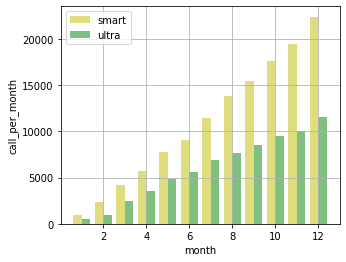

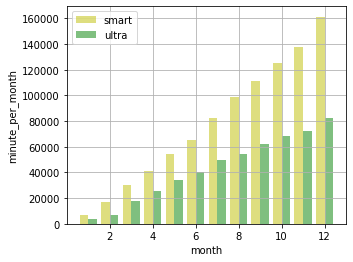

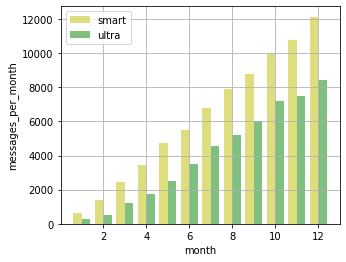

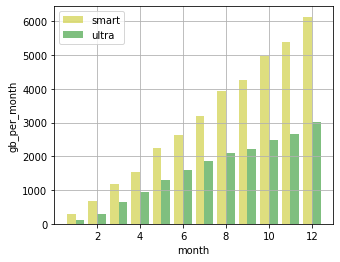

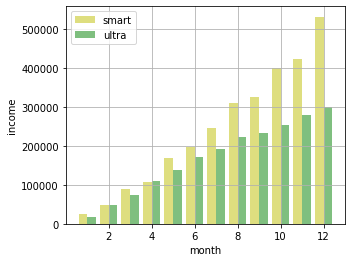

In [ ]:
# Построим графики количества минут разговоров, отправленных сообщений, объема интернет-траффика всех абонентов каждого тарифного плана по месяцам
for i in ['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income']:
  plt.figure(figsize = (5,4))
  plt.bar(smart_abonent_month['month'] - 0.2, smart_abonent_month[i], label = 'smart', color = 'y', alpha = 0.5, width = 0.4)
  plt.bar(ultra_abonent_month['month'] + 0.2, ultra_abonent_month[i], label = 'ultra', color = 'g', alpha = 0.5, width = 0.4)

  plt.xlabel('month')
  plt.ylabel(i)
  plt.grid()
  plt.legend(loc = 'best')
  plt.show()

Из графиков видим, что суммарное количество минут разговоров, отправленных сообщений, интернет-траффика и выручки от абонентов тарифа "smart" превышает аналогичные показатели для абонентов тарифа "ulrta".

Общее количество минут разговора, сообщений и объём интернет-трафика пользователям тарифа "smart" в месяц требуется больше, чем абонентам тарифа "ultra".  Но нужно учитывать, что число абонентов тарифа "smart" более, чем в два раза превышает число абонентов тарифа "ultra". 

Поэтому построим аналогичные графики для средних показателей на одного абонента.


In [ ]:
smart_abonent_month_mean = smart_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].mean().reset_index()
ultra_abonent_month_mean = ultra_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].mean().reset_index()


<ipython-input-165-e3cbb0329480>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  smart_abonent_month_mean = smart_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].mean().reset_index()
<ipython-input-165-e3cbb0329480>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ultra_abonent_month_mean = ultra_abonent.groupby(['month'])['call_per_month', 'minute_per_month', 'messages_per_month', 'gb_per_month', 'income'].mean().reset_index()


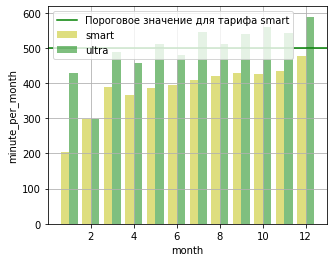

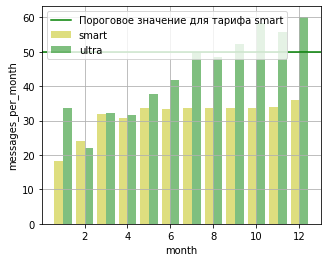

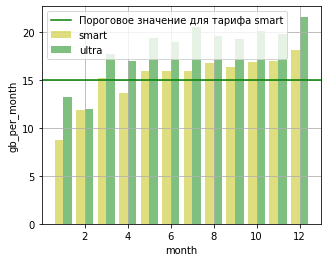

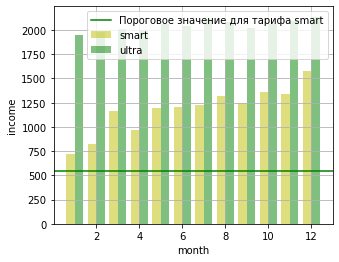

In [ ]:
# Построим графики количества минут разговоров, отправленных сообщений, объема интернет-траффика на одного абонентов каждого тарифного плана по месяцам
for i in ['minute_per_month', 'messages_per_month', 'gb_per_month', 'income']:
  plt.figure(figsize = (5,4))
  plt.bar(smart_abonent_month_mean['month'] - 0.2, smart_abonent_month_mean[i], label = 'smart', color = 'y', alpha = 0.5, width = 0.4)
  plt.bar(ultra_abonent_month_mean['month'] + 0.2, ultra_abonent_month_mean[i], label = 'ultra', color = 'g', alpha = 0.5, width = 0.4)

  if i == 'minute_per_month':
    porog = 500
  elif i == 'messages_per_month':
    porog = 50
  elif i == 'gb_per_month':
    porog = 15
  else:
    porog = 550

  plt.axhline(y = porog, label = 'Пороговое значение для тарифа smart', color = 'g')

  plt.xlabel('month')
  plt.ylabel(i)
  plt.grid()
  plt.legend(loc = 'best')
  plt.show()

Видим другую картину. Во все месяцы, кроме февраля, число израсходованных минут разговоров, отправленных сообщений и израсходованного интернет-траффика у абонентов тарифного плана "smart" в среднем было меньше, чем у абонентов тарифа "ultra". И выручка, полученная со всех абонентов в месяц в среднем была выше на тарифном плане "ultra" ежемесячно.

Из графиков видим, что абоненты тарифа smart не полностью используют пакет минут и сообщений тарифного плана. С мая (5 месяца) эти абоненты расходуют интернет-траффика немного больше, чем предусмотрено абонентной платой. То есть основную часть выручки формирует оплата интернет-траффика сверх тарифного плана.

Для пользователей тарифа ultra пороговые значения, предусмотренные тарифным планом, тоже не расходуются в полном объеме. 

Можем сказать, что в среднем в месяц каждый абонент тарифа ultra в месяц совершает больше звонков, отправляет больше сообщений, использует больший объем интернет-траффика, чем абонент тарифного плана smart. Но это всё в рамках общего пакета ежемесячной платы.

Оценим средние показатели. Вычислим основные числовые характеристики случайных величин числа израсходованных минут разговоров, отправленных сообщений и израсходованного интернет-траффика за месяц всеми абонентами.

In [ ]:
# для абонентов тарифа smart. По всем пользователям
smart_abonent_month_mean.describe()

,month,call_per_month,minute_per_month,messages_per_month,gb_per_month,income
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,53.941679,386.642510,31.404336,15.194241,1179.670841
std,3.605551,10.447937,72.099460,5.094809,2.621416,238.650345
min,1.000000,27.676471,203.852941,18.235294,8.735294,721.323529
25%,3.750000,53.571631,382.304759,31.578125,14.831575,1114.239854
50%,6.500000,56.137574,401.996739,33.638380,15.929510,1213.984271
75%,9.250000,59.650262,426.754925,33.767242,16.772366,1326.208676
max,12.000000,66.289941,477.144970,35.887574,18.147929,1575.488166


In [ ]:
# для абонентов тарифа ultra. По всем пользователям
ultra_abonent_month_mean.describe()

,month,call_per_month,minute_per_month,messages_per_month,gb_per_month,income
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,69.073584,495.581450,43.678905,18.245996,2046.820446
std,3.605551,10.731846,76.976806,12.267012,2.905004,56.692719
min,1.000000,41.541667,297.125000,21.958333,12.000000,1950.000000
25%,3.750000,66.076299,474.281331,33.407658,17.477396,2011.603194
50%,6.500000,71.898591,510.552030,45.082721,19.308306,2049.493603
75%,9.250000,75.284607,542.483250,53.162979,19.870738,2085.424222
max,12.000000,82.721429,588.571429,60.178571,21.585714,2137.500000


По описательной статистике можем сделать вывод о том, что в среднем за месяц абоненты тарифа smart расходуют примерно в два раза больше минут разговоров, отправляют сообщения и расходуют интернет-траффик. Среднемесячная выручка от этих абонентов примерно в 1,5 раза выше выручки, полученной с абонентов тарифа ultra.

Сравнение максимальных значений с 75% квантилью и минимальных значений с 25% квантилью показывает, что данные не содержат большого числа выбросов, они достаточно редки.

Медианные и средние значения принимают достаточно близкие значения, т.е. распределения почти симметричны.

Оценим средние показатели. Вычислим основные числовые характеристики случайных величин числа израсходованных минут разговоров, отправленных сообщений и израсходованного интернет-траффика за месяц на одного абонента.

In [ ]:
# для абонентов тарифа smart. На одного абонента


In [ ]:
# для абонентов тарифа ultra. На одного абонента


По описательной статистике можем сделать вывод о том, что в среднем за месяц абоненты тарифа smart расходуют примерно в два раза больше минут разговоров, отправляют сообщения и расходуют интернет-траффик. Среднемесячная выручка от этих абонентов примерно в 2 раза выше выручки, полученной с абонентов тарифа ultra.

Сравнение максимальных значений с 75% квантилью и минимальных значений с 25% квантилью показывает, что данные не содержат большого числа выбросов, они достаточно редки.

Медианные и средние значения принимают достаточно близкие значения, т.е. распределения почти симметричны.

Изучим распределения числа использованных минут разговоров, числа отправленных сообщений, объема интернет-траффика, которые расходуют абоненты каждого тарифа.



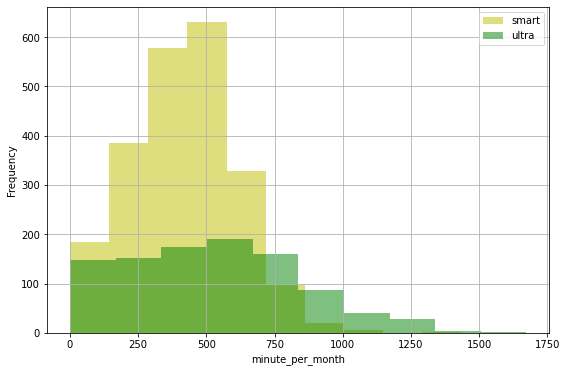

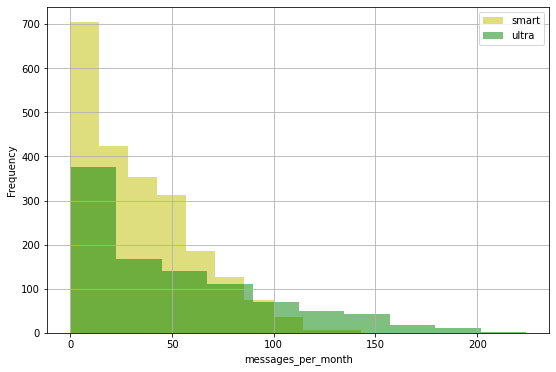

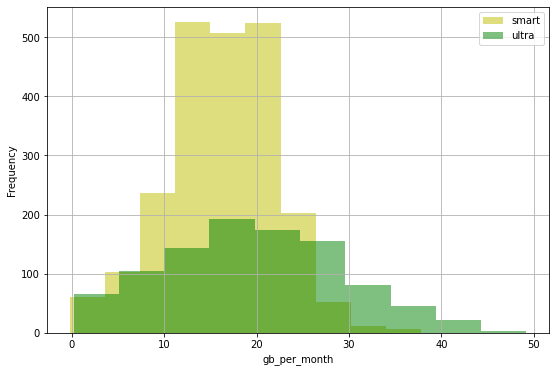

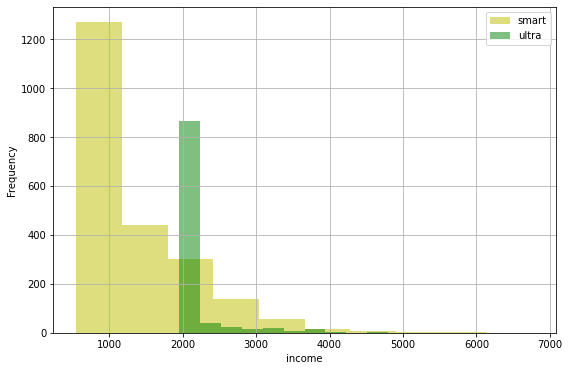

In [ ]:
# Построим графики количества минут разговоров, отправленных сообщений, объема интернет-траффика на одного абонентов каждого тарифного плана по месяцам
for i in ['minute_per_month', 'messages_per_month', 'gb_per_month', 'income']:
  plt.figure(figsize = (9,6))
  plt.hist(smart_abonent[i] - 0.2, label = 'smart', color = 'y', alpha = 0.5)
  plt.hist(ultra_abonent[i] + 0.2, label = 'ultra', color = 'g', alpha = 0.5)

  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.grid()
  plt.legend(loc = 'best')
  plt.show()

Распределение количества потраченных минут на разговоры для тарифа smart и ultra похожи на нормальное распределение. Для тарифа smart это распределение более симметрично. Мат.ожидание и медиана имеют примерно одинаковые значения. Основная часть абонентов расходует от 200 до 500 минут разговоров. Для тарифа ultra толстый хвост слева, асимметрия влево, т.е. основная часть абонентов расходует от 0 до 750 минут разговоров.

Распределение количества отправленных сообщений для каждого тарифа похоже на экспоненциальное распределение. Большая часть абонентов отправляет небольшое количество сообщений. Абоненты тарифа smart отправляют в среднем около 30 сообщений, абоненты тарифа ultra - в среднем около 40 сообщений.

Распределение объема израсходованного интернет-траффика похоже на нормальное, симметричное для абонентов каждого из тафных планов. Центр для абонентов smart примерно на 15 Гб, центр распределения для абонентов ultra - примерно на 19 Гб.

Гистограммы выручки имеют одинаковую форму, но смещены относительно друг друга с учетом абонентской платы. Большинство абонентов тарифа smart приносят выручку от 550 до 1200 рублей, большинство абонентов тарифа ultra приносят выручку от 1950 до 2200 рублей. Тонкие длинные хвосты справа.

Вычислите коэффициенты корреляции показателей для абонентов тарифного плана smart и ultra. От каких показателей в большей степени формируется прибыль компании.

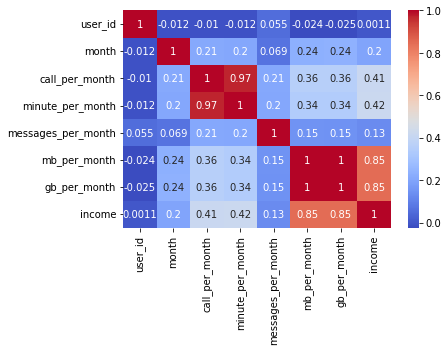

In [ ]:
corr_matrix_smart = smart_abonent.corr()
sns.heatmap(corr_matrix_smart, annot = True, cmap = 'coolwarm')
plt.show()


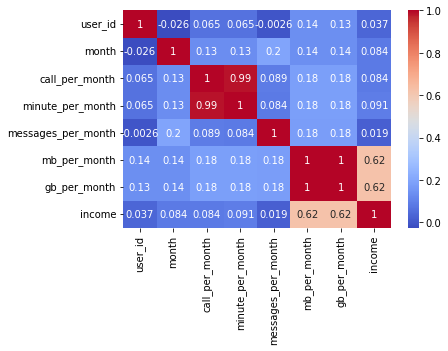

In [ ]:
corr_matrix_ultra = ultra_abonent.corr()
sns.heatmap(corr_matrix_ultra, annot = True, cmap = 'coolwarm')
plt.show()


In [ ]:
# Вычислим числовые характеристики количества потраченных минут на разговоры, количества отправленных сообщений, объема использованного интернет-траффика для абонентов тарифов smart, приходящихся на одного абонента


In [ ]:
# Вычислим числовые характеристики количества потраченных минут на разговоры, количества отправленных сообщений, объема использованного интернет-траффика для абонентов тарифов smart, приходящихся на одного абонента


Величина среднеквадратического отклонения характеризует степень разброса данных относительно центра. Согласно правилу трёх сигм в интервале шириной 6 сигм с центром в точке мат. ожидания лежит 99,73% всех значений. Сравним случайные величины величины по характеристике среднеквадратического отклонения.

Для количества потраченных минут на разговоры для тарифов smart и ultra ср.кв.отклонения равны 72,1 и 77 минут соответственно. Это означает, что 95% абонентов тарифного плана smart в месяц разговаривают примерно от 386 - 2*72 до 386 + 2*72, т.е. тратят на разговоры от 242 до 530 минут. Небольшая часть абонентов превышает тарифную планку, а, значит, выручка по этой части будет небольшая. Для 95% абонентов тарифного плана ultra интервал использования минут разговоров в месяц составляет примерно от 341 до 649 минут. Видим, что абоненты тарифного плана ultra тратят на разговоря больше минут, но не выходят за пределы лимита по этому тарифу.

Для количества отправленных сообщений для тарифов smart и ultra ср.кв.отклонения равны 5 и 12 сообщений соответственно. Это означает, что 95% абонентов тарифного плана smart в месяц отправляют примерно от 31 - 2*5 до 31 + 2*5, т.е. отправляют от 21 до 41 сообщения в месяц. За пределы лимита по тарифу не выходят, дополнительная выручка по этой части будет практически отсутствовать. Для 95% абонентов тарифного плана ultra интервал использования минут разговоров в месяц шире и составляет примерно от 44- 24 до 44 + 24 сообщений, т.е. от 20 до 68. Разброс примерно в 2 раза больше, чем для абонентов тарифного плана smart. Видим, что абоненты тарифного плана ultra по числу отправленных сообщений не выходят за пределы лимита по этому тарифу.

Для объема использованного интернет-траффика для тарифов smart и ultra ср.кв.отклонения равны 2666 и 2969 Мб, но при округлении оператором получаем одинаковые 3 Гб. Однако средние значения разные, поэтому абоненты тарифа smart примерно раходуют от 9 до 21 Гб и примерно 50% этих абонентов превышают лимит. Поэтому оплачивают дополнительный объем интернет-траффика и формируют дополнительную выручку. Для абонентов тарифа ultra объем интернет-траффика составляет примерно от 18 - 6 до 18 + 6 Гб, т.е. от 12 до 24 Гб, что немного больше, чем для абонентов smart. Однако никто из абонентов не выходит за пределы тарифного плана и выручка для них формируется исключительно за счет абонентской платы.

# Шаг 4. Проверьте гипотезы

•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

•	как вы формулировали нулевую и альтернативную гипотезы;

•	какой критерий использовали для проверки гипотез и почему.

###  1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Проверьте гипотезу о равенстве средних, используя st.ttest_ind. 

Пусть mean_income_smart, mean_income_ultra - математические ожидания выручки абонентов тарифа smart и ultra соответственно.

Основная гипотеза H0: mean_income_smart = mean_income_ultra

Альтернативная гипотеза: H1: mean_income_smart <> mean_income_ultra (знак <> следует понимать как не равно). Будем строить двустороннюю критическую область.

Выберем уровень значимости alpha = 0.05 (ошибка первого рода, т.е. вероятность отклонить нулевую гипотезу, если она верна). 

Для проверки гипотезы о равенстве средних применяют t-статистику Стьюдента.



Для вычисления наблюдаемого значения критерия вычислите средние и дисперсии выручки абонентов тарифа smart и ultra.


In [ ]:
# Выделим массивы, содержащие выручку от абонентов разных тарифных планов
income_smart = smart_abonent['income'].values
income_ultra = ultra_abonent['income'].values

income_smart

array([1150,  550,  550, ..., 1150,  950,  550])

In [ ]:
# Оценим дисперсии этих совокупностей для проверки гипотезы
print(np.var(income_smart))
print(np.var(income_ultra))

669430.4361979931
141244.31956107615


Дисперсии совокупностей различны, поэтому при использовании st.ttest_ind параметр equal_var = False.

In [ ]:
alpha = 0.05
res = st.ttest_ind(income_smart, income_ultra, equal_var = False)
print(f'p-значение {res.pvalue}')

p-значение 1.927011394420941e-250


In [ ]:
if (res.pvalue < alpha):
  print('нет основания принять основную гипотезу, то есть выручки разные')
else:
  print('нет основания отвергать основную гипотезу, то есть выручки равны')


нет основания принять основную гипотезу, то есть выручки разные


Основная гипотеза отвергается в пользу альтернативной. Делаем вывод, что средние выручки абонентов тарифа smart и ultra различаются существенно.

### 2. Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов 

Проверим гипотезу о равенстве средних. 

Пусть mean_income_moscow, mean_income_other - математические ожидания выручки абонентов Москвы и других регионов соответственно.

Основная гипотеза H0: mean_income_moscow = mean_income_other

Альтернативная гипотеза: H1: mean_income_smart <> mean_income_other (знак <> следует понимать как не равно). Будем строить двустороннюю критическую область.

Выберем уровень значимости alpha = 0.05 (ошибка первого рода, т.е. вероятность отклонить нулевую гипотезу, если она верна). 

Для проверки гипотезы о равенстве средних применяют t-статистику Стьюдента.

Для вычисления наблюдаемого значения критерия вычислим средние и дисперсии выручки абонентов тарифа smart и ultra.

Сформируем массивы с выручкой абонентов Москвы и других регионов. Обратимcя к общей таблице abonents.


In [ ]:
income_Moscow = abonents.query('city == "Москва"')['income'].values
income_other = abonents.query('city != "Москва"')['income'].values

In [ ]:
# Оценим дисперсии этих совокупностей для проверки гипотезы
print(np.var(income_Moscow))
print(np.var(income_other))

564710.7117467273
653818.4925923496


Дисперсии совокупностей различны, поэтому при использовании st.ttest_ind параметр equal_var = False.

In [ ]:
alpha = 0.05
res = st.ttest_ind(income_Moscow, income_other, equal_var = True)
print(f'p-значение {res.pvalue}')

if (res.pvalue < alpha):
  print('нет основания принять основную гипотезу, то есть выручки разные')
else:
  print('нет основания отвергать основную гипотезу, то есть выручки равны')

p-значение 0.5400751614511182
нет основания отвергать основную гипотезу, то есть выручки равны


Таким образом, средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов

# Шаг 5. Напишите общий вывод

Сделайте вывод, какой тариф следует развивать компании. Пользователи какого тарифа приносят больше прибыли и за счет каких услуг.


**Компании следует развить тариф смарт.** 

Так как выручка по данному тарифу выходит больше, и выяснили, что от региона ее размер не зависит. Также, вероятность, что приобретят тариф 'smart' больше, так как стоимость сильно ниже. Как видно из анализа, люди более готовы переплачивать больше по тарифу смарт, нежели чем в ultra.